In [20]:
import warnings                  # Ignore  the warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# data visualisation and manipulationimport numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)#import the necessary modelling algos.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
train=pd.read_csv('/home/sam/Downloads/Churn_Modelling.csv')
df=train.copy()

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.shape

(10000, 14)

In [6]:
# check for null values.
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
def calc_limits(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)
    
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    
    lower,upper = calc_limits(feature)
    l=[df[feature] for i in df[feature] if i>lower and i<upper] 
    print("Number of data points remaining if outliers removed : ",len(l))

Number of data points remaining if outliers removed :  9940


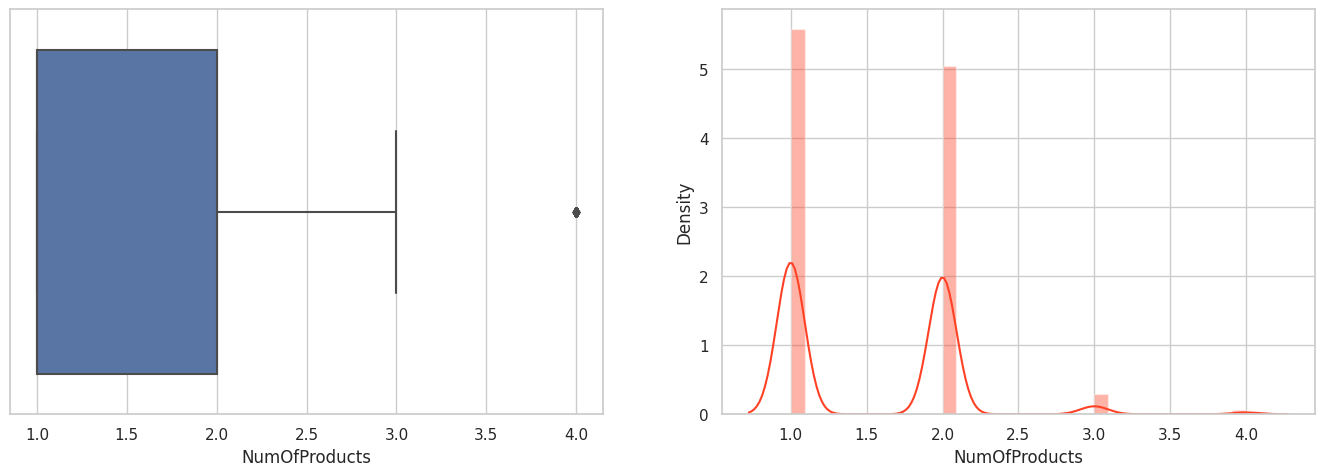

In [12]:
plot('NumOfProducts')

Number of data points remaining if outliers removed :  10000


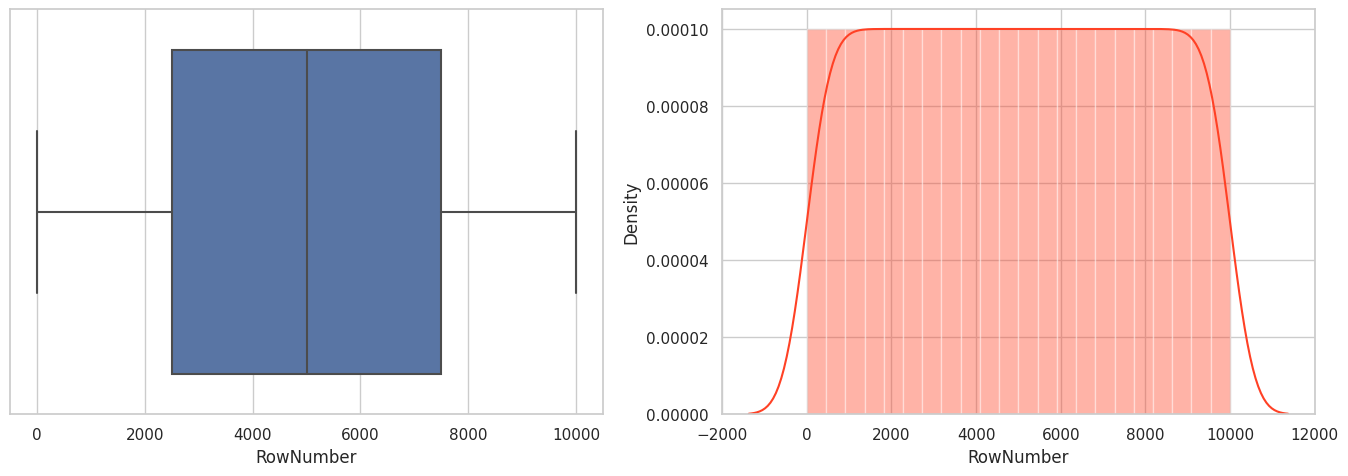

In [14]:
plot('RowNumber')

Number of data points remaining if outliers removed :  10000


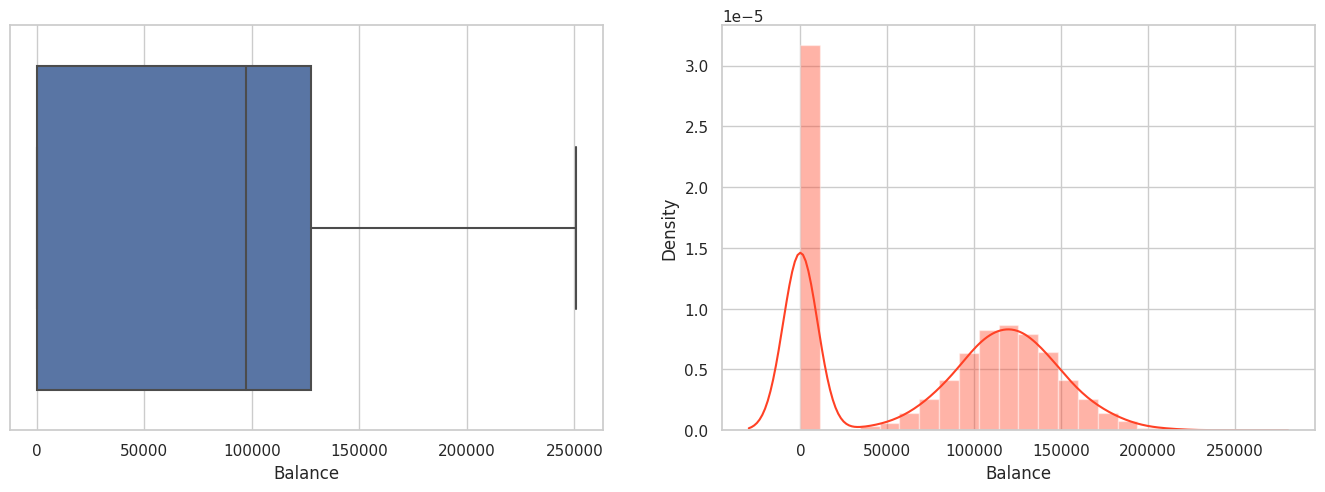

In [15]:
plot('Balance')

Male      5457
Female    4543
Name: Gender, dtype: int64

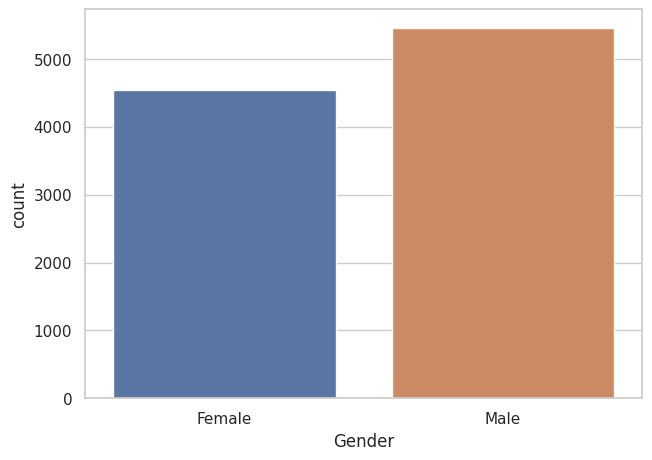

In [17]:
sns.countplot(data=df,x='Gender')
df['Gender'].value_counts()

<AxesSubplot: >

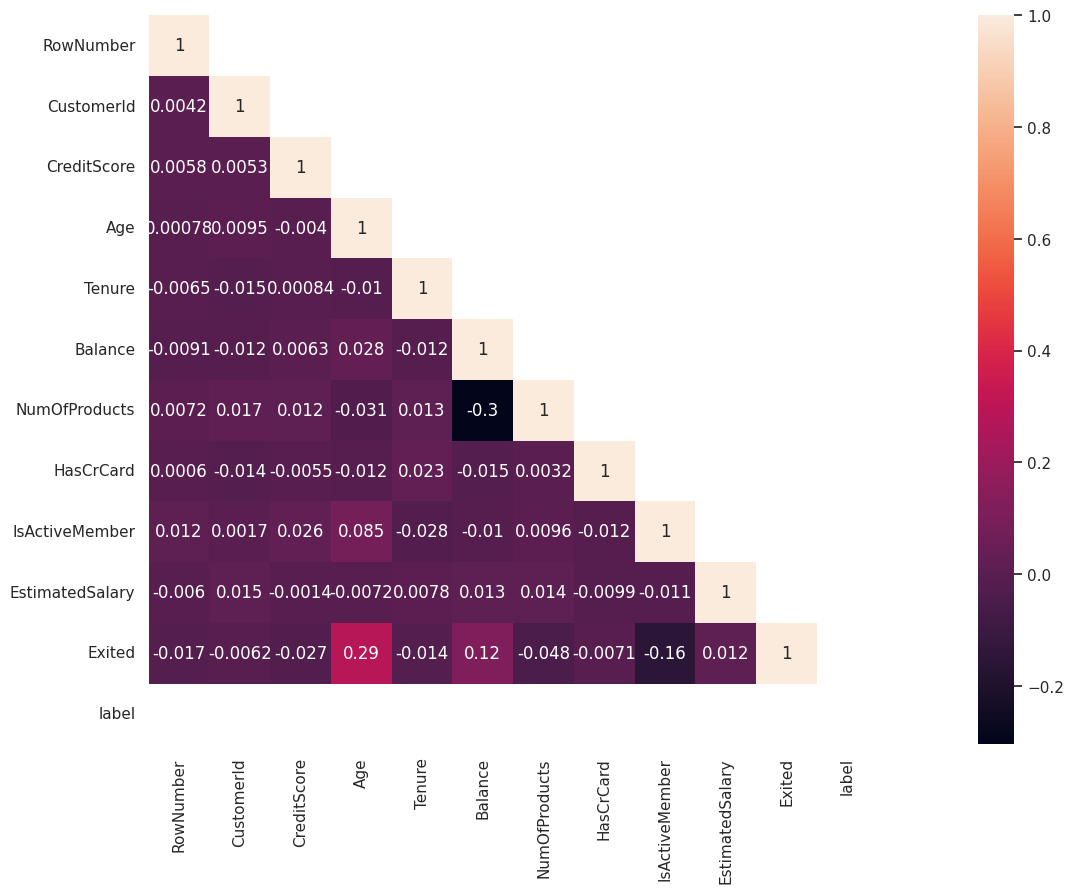

In [21]:
temp = []
for i in df.Gender:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
df['label'] = temp
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(23,9)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [23]:
df.drop('Age',axis=1,inplace=True)

In [57]:
#Clean the Data
train = train.dropna()
train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


KeyError: "['HasCrCard'] not found in axis"

KeyError: "['Age'] not found in axis"